# Meal Plan Recommendations

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv("meal_plan.csv")
df

,FBS,Age,Gender,BMI,Meal_Plan
0,171,47,Male,20.2,p1.0
1,168,50,Male,20.2,p1.0
2,178,52,Male,21.2,p1.0
3,178,52,Male,21.2,p1.0
4,179,53,Male,21.2,p1.0
...,...,...,...,...,...
509,194,47,Female,30.9,p3.9
510,135,55,Male,32.5,p3.9
511,135,55,Male,32.5,p3.9
512,137,56,Male,32.5,p3.9


# Data Pre-processing 

In [90]:
data = data.drop_duplicates()
sum(data.duplicated())

0

In [104]:
df.isna().sum().sort_values()

FBS             0
Age             0
Gender          0
BMI             0
Meal_Plan       0
Meal_Plan_le    0
dtype: int64

In [91]:
le = LabelEncoder()
data = df 

data["Gender"] = le.fit_transform(df["Gender"])


def function(x):
    if x > 170:
        return 1
    else:
        return 0
data["FBS"] = data["FBS"].apply(function)    
data.head(50)
le1 = LabelEncoder()
le1.fit(df["Meal_Plan"] )
data["Meal_Plan"] = le1.transform(df["Meal_Plan"] )
data["Meal_Plan_le"] = le1.inverse_transform(df["Meal_Plan"])
data.head(10)

,FBS,Age,Gender,BMI,Meal_Plan,Meal_Plan_le
0,0,47,1,20.2,1,1
1,0,50,1,20.2,1,1
2,0,52,1,21.2,1,1
3,0,52,1,21.2,1,1
4,0,53,1,21.2,1,1
5,0,22,0,21.5,1,1
6,0,30,0,21.5,1,1
7,0,48,0,21.9,1,1
8,0,48,0,21.9,1,1
9,0,50,0,22.0,1,1


In [92]:
tmp_one = data[["Meal_Plan","Meal_Plan_le"]]
tmp_two = tmp_one.drop_duplicates(subset = None)
tmp_dic = tmp_two.to_dict("records")
tmp_dic

[{'Meal_Plan': 1, 'Meal_Plan_le': 1},
 {'Meal_Plan': 2, 'Meal_Plan_le': 2},
 {'Meal_Plan': 3, 'Meal_Plan_le': 3},
 {'Meal_Plan': 4, 'Meal_Plan_le': 4},
 {'Meal_Plan': 5, 'Meal_Plan_le': 5},
 {'Meal_Plan': 6, 'Meal_Plan_le': 6},
 {'Meal_Plan': 7, 'Meal_Plan_le': 7},
 {'Meal_Plan': 8, 'Meal_Plan_le': 8},
 {'Meal_Plan': 0, 'Meal_Plan_le': 0},
 {'Meal_Plan': 9, 'Meal_Plan_le': 9},
 {'Meal_Plan': 10, 'Meal_Plan_le': 10},
 {'Meal_Plan': 11, 'Meal_Plan_le': 11},
 {'Meal_Plan': 12, 'Meal_Plan_le': 12},
 {'Meal_Plan': 13, 'Meal_Plan_le': 13},
 {'Meal_Plan': 14, 'Meal_Plan_le': 14},
 {'Meal_Plan': 15, 'Meal_Plan_le': 15},
 {'Meal_Plan': 16, 'Meal_Plan_le': 16},
 {'Meal_Plan': 17, 'Meal_Plan_le': 17},
 {'Meal_Plan': 18, 'Meal_Plan_le': 18},
 {'Meal_Plan': 19, 'Meal_Plan_le': 19},
 {'Meal_Plan': 20, 'Meal_Plan_le': 20},
 {'Meal_Plan': 21, 'Meal_Plan_le': 21},
 {'Meal_Plan': 22, 'Meal_Plan_le': 22},
 {'Meal_Plan': 23, 'Meal_Plan_le': 23},
 {'Meal_Plan': 24, 'Meal_Plan_le': 24},
 {'Meal_Plan': 25, '

In [93]:
data.columns

Index(['FBS', 'Age', 'Gender', 'BMI', 'Meal_Plan', 'Meal_Plan_le'], dtype='object')

## Exploratory data analysis

C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\chaml\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


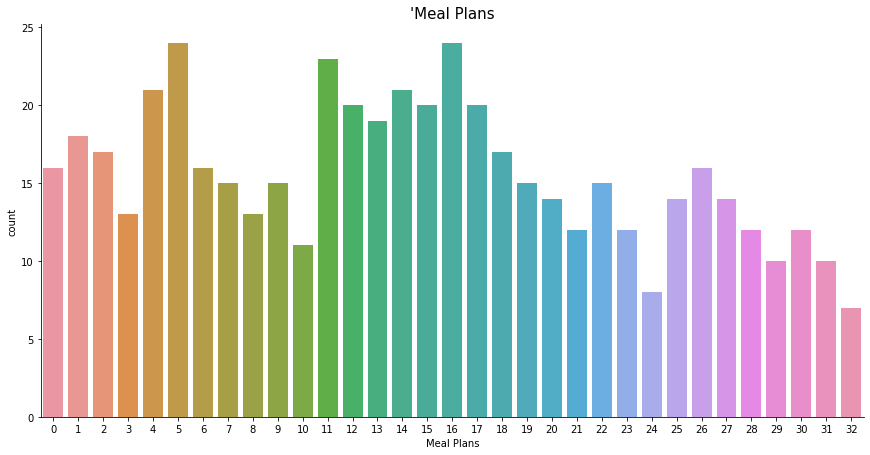

In [94]:
sns.factorplot(data=data, x=data["Meal_Plan_le"], kind= 'count',size=6,aspect=2)
plt.xlabel('Meal Plans')
plt.title("'Meal Plans",fontsize=15)
plt.show()

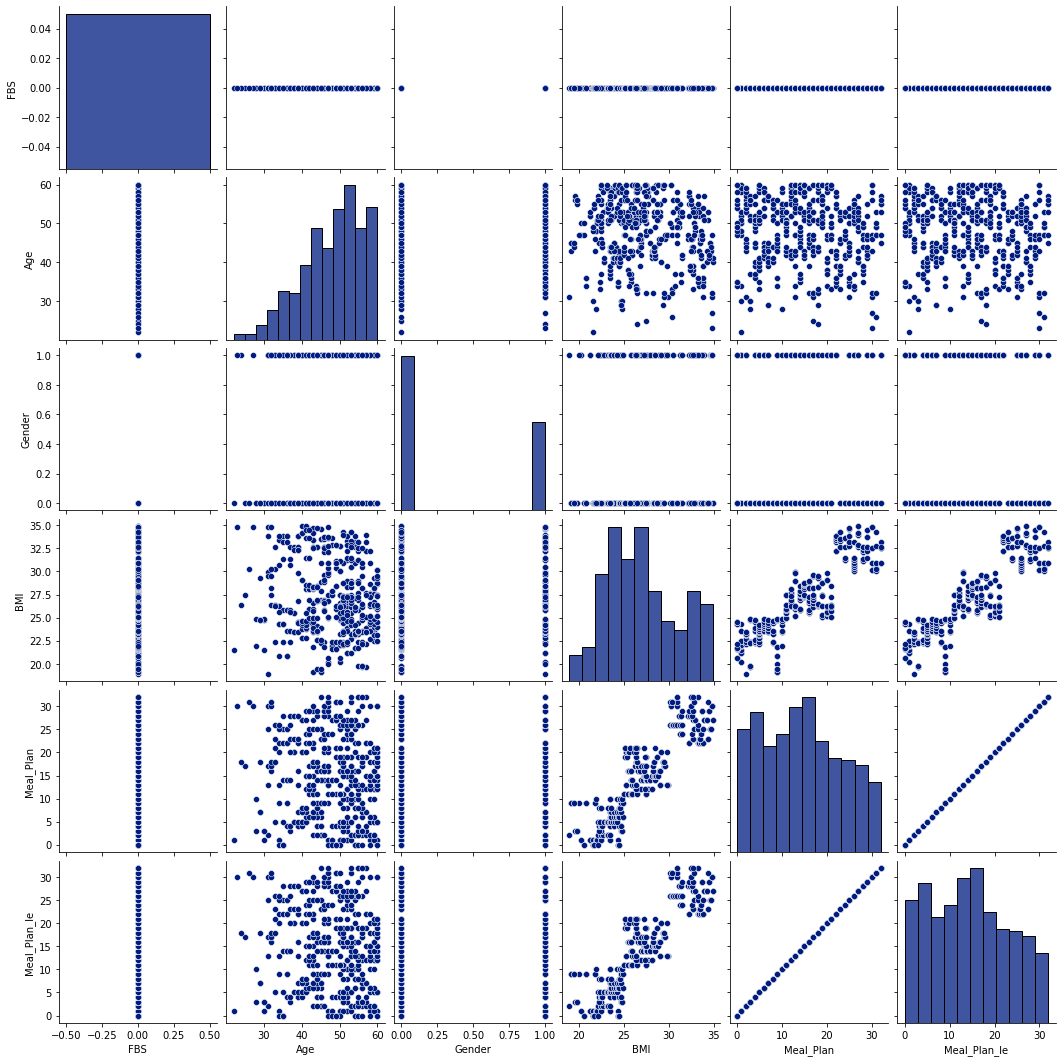

In [95]:
sns.pairplot(df)

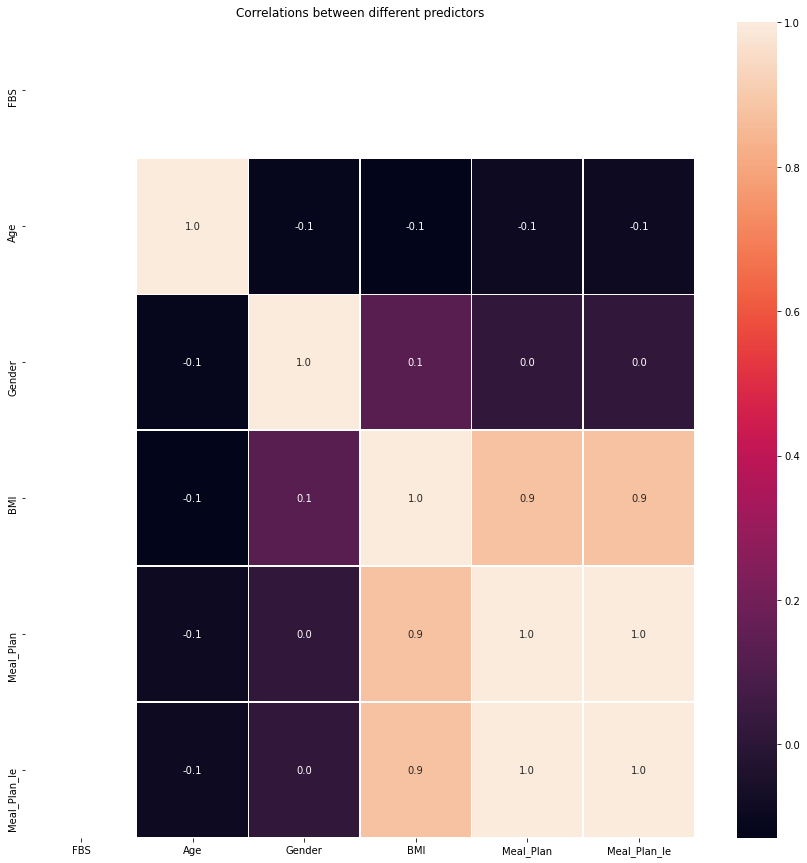

In [96]:
#correlation map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlations between different predictors')
plt.show()

In [97]:
X = data [['FBS', 'Age', 'Gender', 'BMI']].values
X

array([[ 0. , 47. ,  1. , 20.2],
       [ 0. , 50. ,  1. , 20.2],
       [ 0. , 52. ,  1. , 21.2],
       ...,
       [ 0. , 55. ,  1. , 32.5],
       [ 0. , 56. ,  1. , 32.5],
       [ 0. , 53. ,  1. , 32.7]])

In [98]:
y = data['Meal_Plan'].values
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 13, 13, 13, 13

##  Splitting into Test and training data

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

## Model selection 

In [100]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=15)
model.fit(X_train, y_train)
model.score(X_test, y_test)
print('RandomForestClassifierModel Train Score is : ' , model.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , model.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.948905109489051
RandomForestClassifierModel Test Score is :  0.6504854368932039


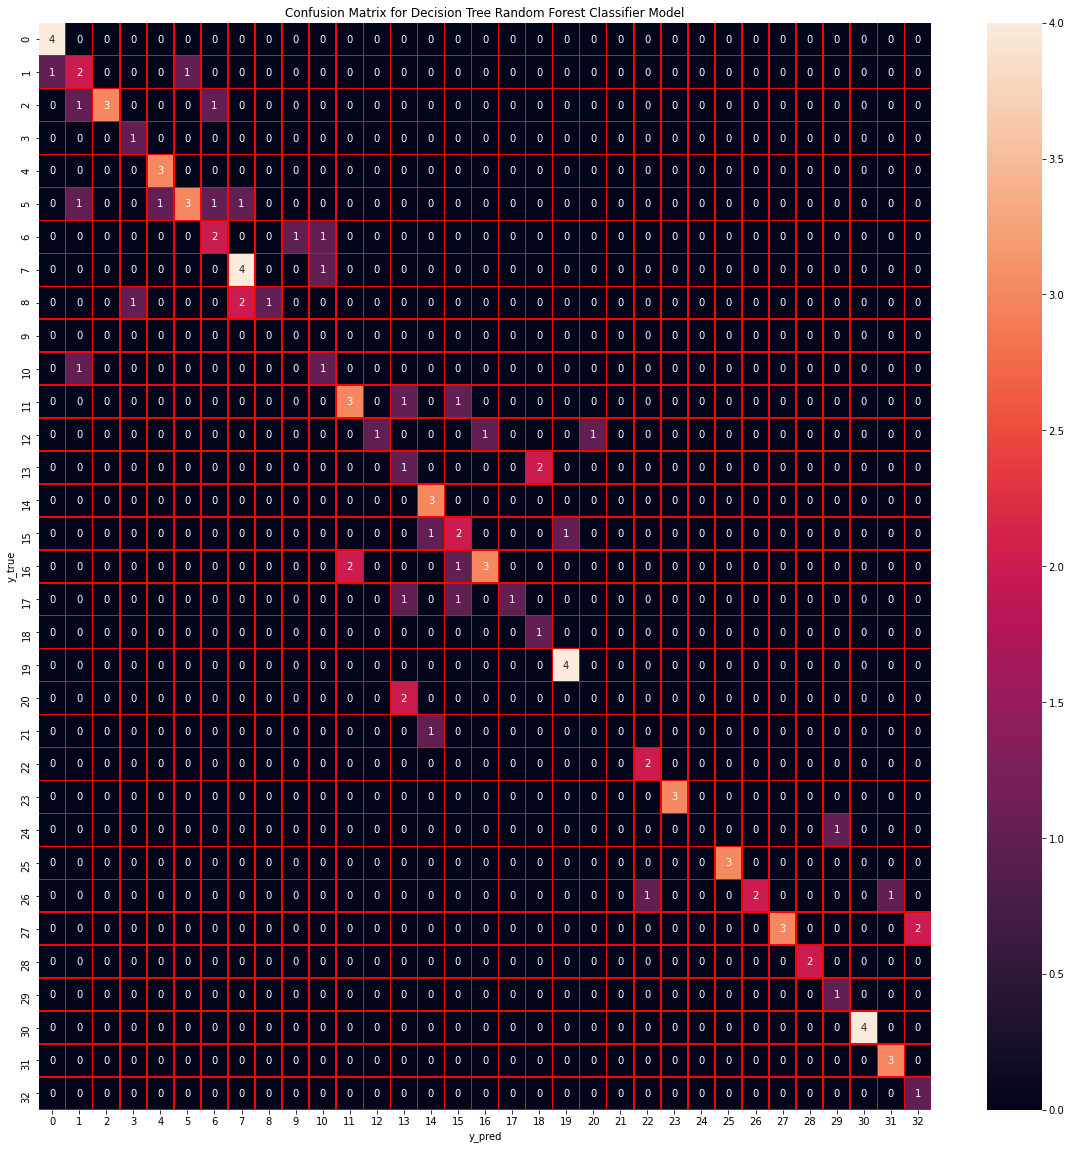

In [101]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix for Decision Tree Random Forest Classifier Model")
plt.show()

In [102]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print('Decision Tree Classifier Train Score is : ' , clf.score(X_train, y_train))
print('Decision Tree Classifier Test Score is : ' , clf.score(X_test, y_test))

Decision Tree Classifier Train Score is :  0.9610705596107056
Decision Tree Classifier Test Score is :  0.6796116504854369


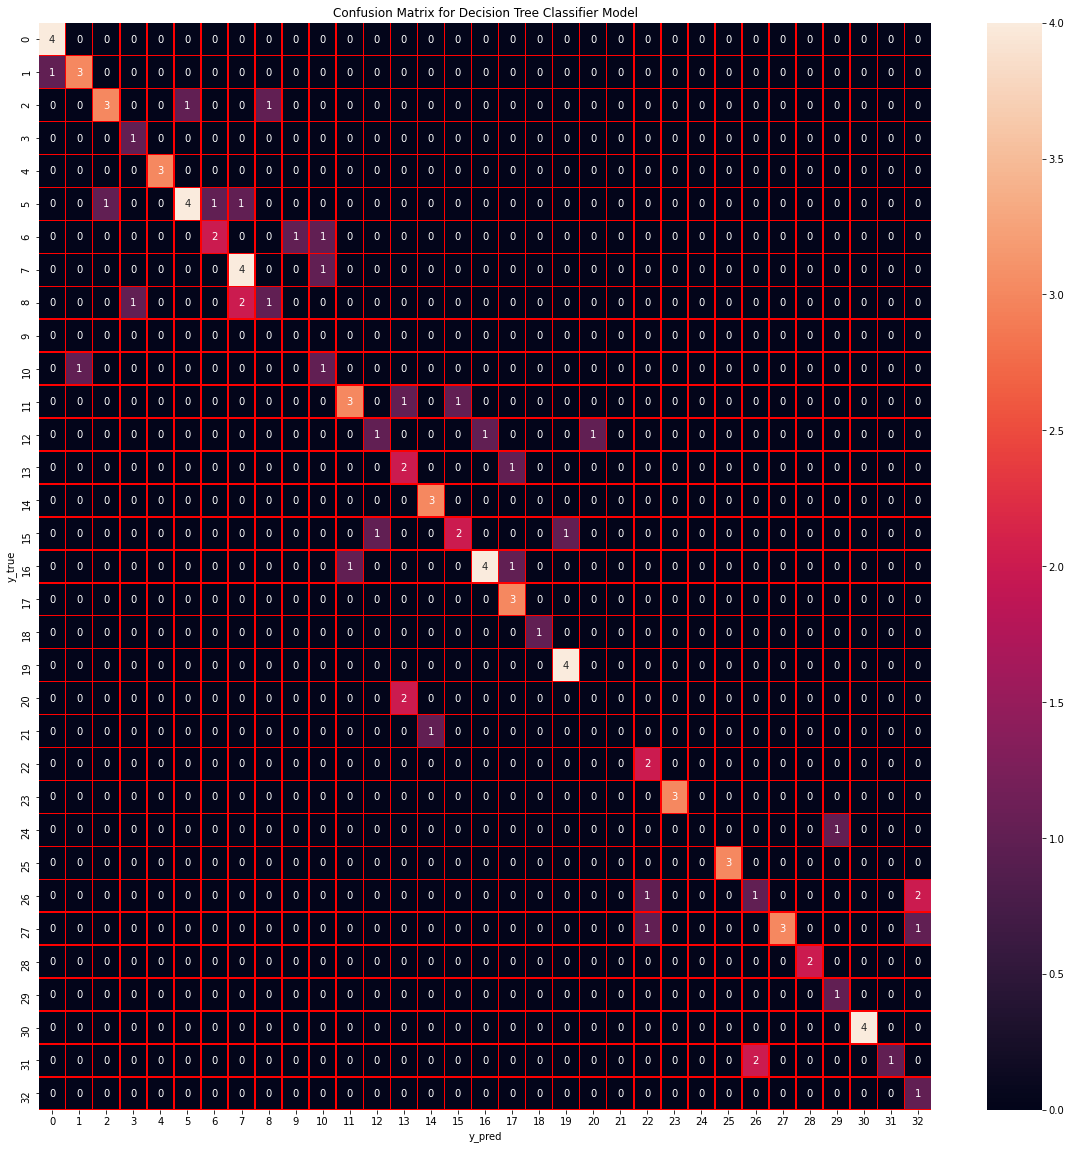

In [103]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Confusion Matrix for Decision Tree Classifier Model")
plt.show()

In [20]:
import joblib
joblib.dump(model, 'model_mealplan')

['model_mealplan']

In [30]:
model = joblib.load('model_mealplan')
model.predict([[1. ,  15. ,   0. ,  10.2]])

array([9])